# 0. Мотивация

Процедурное программирование (то, чем мы занимались ранее: обычные переменные и функции), конечно, полезное и классное, но им сыт не будешь. Как только появляется необходимость в чем-то более-менее сложном и удобном, обычных функций и переменных становится недостаточно. Тут нам на помощь приходит ООП - объектно-ориентированное программирование.



# 1. ООП

Суть ООП такова:

- Данные, которые относятся к решаемой нами задаче, структурируются в виде объектов, каждый из которых относится к определенному классу.

- То, как устроены эти классы - полностью наша ответственность, результат того, как мы формализуем нашу задачу (*что* мы хотим реализовать).

- Классы отвечают за логику работы нашей программы (взаимодействие объектов).



## 2. Объект

**ВСЁ в Python является объектом.**

Функции, переменные, что бы мы ни делали и что бы ни создавали - всё это будет объектом.

Когда мы работаем с каким-то объектом, нам важны две вещи: 

1) Что `<это>` такое? Какие данные `<это>` хранит? [За это отвечают атрибуты]
2) Что мы можем с `<этим>` сделать? (поведение) [За это отвечают методы]

*здесь уместно вспомнить про [duck typing](https://en.wikipedia.org/wiki/Duck_typing)


## 3. Класс

Класс - это набор правил ("инструкция") для объектов, которые принадлежат этому классу.

Каждый объект принадлежит к какому-то классу (который и определяет *поведение и атрибуты* этого объекта - ответы на два вышеназванных вопроса)

*Атрибуты* - (почти) просто переменные, определенные для объектов данного класса.

*Методы* - (почти) просто функции, определенные для объектов данного класса.

### Пример:

Стакан. Каким образом должен выглядеть класс, связанный со стаканами?

1) Ответим на первый вопрос. Про стакан меня волнует: его материал, его максимальный объем, возможно его форма, его текущее состояние (наполненность) и так далее. Это - атрибуты стакана.
2) Ответим на второй вопрос. Что можно сделать со стаканом? Выпить из него, наполнить его. Это - методы стакана.

### Возможные примеры для разбора:

Встроенные классы: 
1) Числа
2) Строки (или любой другой вид коллекций)

Классы, которые можно было бы реализовать:
1) Геометрические фигуры (атрибуты: геом. размеры; методы: вывести площадь...)
2) Студенты (атрибуты: ФИО, оценки, дата рождения; методы: средняя оценка, возраст...)
3) Вектор (атрибуты - очевидно, методы: норма, магические методы для действий над несколькими векторами)


### 3.1 Атрибуты класса

Постепенно разберем все аспекты создания и использования классов. Начнем с синтаксиса создания классов и их атрибутов.

Замечу, что по `PEP-8` название класса пишется `CamelCase`-ом.

```
class <НазваниеКласса>:
    <название_атрибута> = <значение_атрибута>
    def <название_метода>:
        ...
```

In [3]:
class MyFirstClass: # CamelCase
    x = 0

print(MyFirstClass.x)

0


В первом примере мы объявили класс, у которого есть атрибут (класса) `x`, к которому мы можем обратиться через точку.

> В терминах C++ мы создали статический атрибут `x`.

Теперь попробуем создать **экземпляры** класса и обратиться к атрибуту `x` через них. (В коде создается новый класс `A` ради лаконичности записи)

In [2]:
class A:
    x = 0

first = A()
second = A()

print("До изменения атрибута")
print(A.x, first.x, second.x)

A.x = 1

print("После изменения атрибута")
print(A.x, first.x, second.x)

До изменения атрибута
0 0 0
После изменения атрибута
1 1 1


Заметим: у наших экземпляров класса нет атрибута `x`, он есть только у класса, но нам все равно удается получить к нему доступ через экземпляры класса. Это происходит из-за механизма поиска атрибута в Python: если не удается найти атрибут у самого экземпляра, то интерпретатор ищет его у класса этого объекта.

В связи с этим, проверим, что будет, если атрибут будет именно у экземпляра класса:

In [5]:
first.x = 2

print("После изменения атрибута экземпляра")
print(A.x, first.x, second.x)

A.x = 10

print("После изменения атрибута класса")
print(A.x, first.x, second.x)

После изменения атрибута экземпляра
1 2 1
После изменения атрибута класса
10 2 10


Действительно, все работает согласно описанному выше правилу: если мы присваиваем экземпляру некоторое значение атрибута, интерпретатор смотрит именно на него, а не "подглядывает" в атрибут класса. 

Кстати, в таком случае `first.x` уже считается **атрибутом экземпляра**, а не атрибутом класса. Мы также можем объявлять любые другие атрибуты экземпляров и смотреть на них с помощью функции `vars` (пример ниже).

In [9]:
print(vars(first))
print(vars(second))

{'x': 2}
{}


In [8]:
first.y = 42
print(vars(first))

{'x': 2, 'y': 42}


Создание атрибутов объекта обычно происходит когда объект уже создан. Однако, стараются избегать ситуации, когда атрибуты (и методы) экземпляра создаются вне тела класса, так как это может привести к ситуации, когда у объектов одного типа есть разные атрибуты и методы (интерфейс). Ведь сам по себе класс - гарантия того, что у его экземпляров будут определены атрибуты и методы, относящиеся к данному классу.

Чтобы проконтролировать, что у объектов одного типа одинаковый набор атрибутов, определяют специальный метод-"конструктор" класса. Но прежде разберем, как объявляются и вызываются методы класса вообще.

### 3.2 Методы класса.

Методы класса объявляются в теле класса так же, как и обычные функции в модуле.

In [14]:
class B:
    def f():
        print("Метод f класса B")

B.f()

Метод f класса B


Вызвать метод класса можно через точечную нотацию - так же, как и с атрибутами.

Попробуем теперь создать экземпляр класса и вызвать этот метод через него:

In [13]:
b = B()

try: 
    b.f() # B.f(b)
except TypeError as e:
    print(e)


B.f() takes 0 positional arguments but 1 was given


При вызове функции через экземпляр класса возникла ошибка TypeError, которая сообщает, что при попытке вызвать функцию f() был передан 1 аргумент, а ожидалось 0 аргументов. Это объясняется тем, что инструкция `b.f()` неявно преобразуется к инструкции `B.f(b)`, вот и получается ситуация, в которой в нашу функцию передается 1 аргумент.

Т.е. при вызове метода через экземпляр класса первым аргументом неявно передаётся ссылка на этот самый экземпляр. Это позволяет таким методам получать доступ к вызвавшему экземпляру, его атрибутам, методам и т.п. Однако программистам приходится явно указывать дополнительный параметр в объявлении метода класса на первой позиции. Имя этого параметра может быть произвольным, но общепринято называть его `self`. 

Поэтому делают обычно так:

In [15]:
class C:
    def h(self):
        print("Метод h вызывается от экземпляра класса C")
    def f(self, a, b):
        print(f"Метод f вызван с параметрами {a} и {b}")

c = C()
c.h() #C.h(c)
c.f(99, 3773)

Метод h вызывается от экземпляра класса C
Метод f вызван с параметрами 99 и 3773


Т.е. методы класса объявляются как обычные функции, но с одним дополнительным параметром self на первом месте. При вызове этого метода через экземпляр класса этот параметр указывать уже не надо.

На самом деле, такое поведение методов в `Python` - предмет критики ООП в языке. Но ничего не поделать, придется нам привыкнуть.

Получается, на первое время можно выработать для себя такое правило: определили метод в классе - первым аргументом всегда отправляем `self`. Конечно, это не всегда так, иногда требуются так называемые *статические методы* (они одинаково успешно вызываются и от объявления класса, и от экземпляров класса), но про них не сегодня :)

### 3.3 Инициализация объекта.

Теперь, когда мы знаем, как объявляются методы, разберем, как модифицировать создание экземпляров, чтобы гарантировать наличие у них уникальных атрибутов. Статические атрибуты (или атрибуты класса) нужны не всегда, обычно мы хотим, чтобы именно экземпляры нашего класса обладали какими-либо атрибутами.

 >Небольшое отступление: можно заметить, что далее обсуждаются методы класса, которые *как-то необычно выглядят* - окружены двойными нижними подчеркиваниями (еще называются *`dunder`*, потому что говорить "окружен двойными нижними подчеркиваниями" или "`d`ouble `under`score" всем лень). Такие методы называются [специальными](https://docs.python.org/3/glossary.html#term-special-method) или [**магическими**](https://docs.python.org/3/glossary.html#term-magic-method) (потому что "магический" звучит веселее). Они имеют [заранее фиксированные названия](https://docs.python.org/3/reference/datamodel.html#specialnames) и отвечают (как и гласит название) за "магию" или специальные взаимодействия. Про это будет подробнее позже, но вот пример: магический метод `__add__` отвечает за поведение в ситуации, когда между экземплярами вашего класса стоит знак `+` (вспомните, что числа суммируются по правилам математики, а списки и строки конкатенируются).

При создании экземпляра класса (вызов объекта объявления класса) сначала вызывается специальный метод `__new__` соответствующего класса, который именно создаёт объект и возвращает его. Затем у этого уже созданного объекта вызывается специальный метод `__init__`, который его **инициализирует**. Чтобы модифицировать создание объекта, необходимо переопределить один (или оба) из методов `__new__` и `__init__`.

Метод `__new__` переопределяется относительно редко и раскрываться здесь не будет. При инициализации объекта методом `__init__` обычно создаются атрибуты объекта.

Простейший пример:

In [9]:
class D:
    def __init__(self, x):
        print(f"Присваиваем атрибуту значение {x} внутри __init__")
        self.x = x

d = D(42) # обратите внимание на синтаксис
print(d.x)

Присваиваем атрибуту значение 42 внутри __init__
42


Таким образом, мы создадим экземпляр класса, у которого есть атрибут (экземпляра) `x`, и при этом у класса нет статических атрибутов.

Конструкция нашего класса гарантирует, что когда мы создаем новый объект, у него непременно будет атрибут `x`.

## 4. Содержательные примеры.

### 4.1 Стакан
Продолжая пример со стаканами, создадим соответствующий класс.

Для выбора методов были взяты ответы на два ключевых вопроса - см. в начале методички.

Атрибуты сократим, чтобы не делать код слишком перегруженным (все же это пример, а не что-то полезное). Степень заполненности вводить не будем, ограничимся булевым значением пуст/полон, а то с промежуточными состояниями человечество так и не определилось: стакан на 33% полон или на 67% пуст?

In [19]:
class Cup:
    def __init__(self, volume: int, material: str, is_full: bool = False):
        self.volume = volume
        self.material = material
        self.is_full = is_full

    def print_current_state(self):
        print(f"Этот стакан полон? {self.is_full}")

    def fill(self, volume_to_fill):
        if volume_to_fill >= self.volume:
            print("Наполнил стакан")
            self.is_full = True
        else:
            print("Недостаточно воды, чтобы наполнить стакан")

    def drink(self):
        print("Попил водички")
        self.is_full = False


my_favorite_cup = Cup(300, "glass", is_full=True)

my_favorite_cup.print_current_state()
my_favorite_cup.drink()
my_favorite_cup.print_current_state()
my_favorite_cup.fill(100)
my_favorite_cup.fill(300)
my_favorite_cup.print_current_state()

Этот стакан полон? True
Попил водички
Этот стакан полон? False
Недостаточно воды, чтобы наполнить стакан
Наполнил стакан
Этот стакан полон? True


### 4.2 Вектор

В данном примере поиграемся с магическими методами. Это немного выходит за рамки курса, но мне показалось важным показать нечто подобное. Для практики большинство методов будут бесполезны, но они будут написаны просто так, чтобы показать, что вообще можно сделать.

Реализуем класс - трехмерный вектор в евклидовом пространстве. 

Каждому методу будет предшествовать комментарий, в котором будет сказано, за какое поведение этот метод отвечает. Также смотрите примеры после объявления класса.

In [2]:
class Vector3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    # отвечает за поведение функции abs(),
    # то есть abs(a) = (a.x**2 + a.y**2 + a.z**2)**0.5
    def __abs__(self):
        return (self.x**2 + self.y**2 + self.z**2) ** 0.5

    # отвечает за поведение оператора равенства ==.
    # То есть, a == b <=> a.x == b.x and a.y == b.y and a.z == b.z
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z

    # отвечает за поведение оператора сложения + между двумя экземплярами класса.
    # a - b создает вектор с координатами (a.x - b.x, a.y - b.y, a.z - b.z)
    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)

    # аналогично сложению для разности
    def __sub__(self, other):
        return Vector3D(self.x - other.x, self.y - other.y, self.z - other.z)

    # отвечает за поведение оператора умножения *. В данном случае реализуем скалярное умножение.
    # a * b = a.x * b.x + a.y * b.y + a.z * b.z (это число, а не вектор)
    def __mul__(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    # отвечает за поведение оператора @. В нашем случае реализуем векторное произведение.
    # a @ b = (a.y * b.z - a.z * b.y, a.z * b.x - a.x * b.z, a.x * b.y - a.y * b.x)
    def __matmul__(self, other):
        return Vector3D(
                self.y * other.z - self.z * other.y,
                self.z * other.x - self.x * other.z,
                self.x * other.y - self.y * other.x,
        )

    """Если мы хотим использовать не только a + b, но и a += b, то есть составное присваивание, 
    нужно определить соответствующие методы, они идентичны обычным, но добавляется i в названии"""

    def __iadd__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)

    def __isub__(self, other):
        return Vector3D(self.x - other.x, self.y - other.y, self.z - other.z)

    # отвечает за поведение функции str().
    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

In [34]:
a = Vector3D(1, 1, 1)
print(a)
print(abs(a))

Vector(1, 1, 1)
1.7320508075688772


In [6]:
a = Vector3D(0, 1, -1)
b = Vector3D(1, 1, -1)
print(a == b)
print(a != b)

False
True


In [37]:
a = Vector3D(1, 1, 1)
b = Vector3D(2, 3, -2)

print(f"a + b = {a + b}")
print(f"a - b = {a - b}")
print(f"a * b = {a * b}")
print(f"a @ b = {a @ b}")

a + b = Vector(3, 4, -1)
a - b = Vector(-1, -2, 3)
a * b = 3
a @ b = Vector(-5, 4, 1)
a == b = False


# Outro

Данный материал - лишь введение в ООП и классы как концепцию, которая используется во всех актуальных языках программирования (кроме C, но у него есть брат с ООП - C++)

Стоит отметить, что мир ~~интересней, чем нам кажется~~ ООП гораздо больше того, что было разобрано на занятиях: 

Нужно упомянуть и "святую троицу", на которой строится весь объектно-ориентированный подход: **инкапсуляцию**, **полиморфизм** и **наследование**. Ни на что из этого (почти) не хватило время во время наших занятий (возможно, будет освещаться наследование от базовых классов во время обсуждения контейнеров, но это ситуативно)

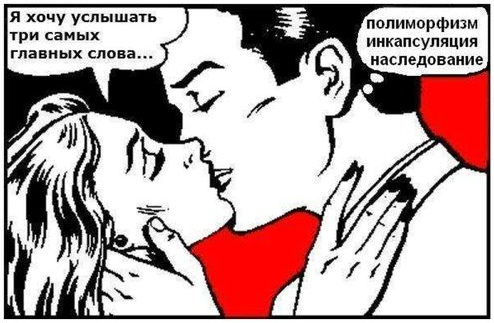


Отдельного упоминания заслуживают и [SOLID-принципы](https://ru.wikipedia.org/wiki/SOLID_(программирование)) проектирования нашего кода.

# Ссылки: 

Пока в разработке.

https://habr.com/ru/articles/463125/